# Classification of Arrhythmia

### 1. Importing important module 

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import math as mt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer

### 2. Reading Dataset

In [2]:
df=pd.read_csv("uci_arrhythmia/arrhythmia.csv",header=None)

Looking at the first 5 rows of the dataset

In [3]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
5,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
6,40,1,160,52,77,129,377,133,77,77,...,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,1
7,49,1,162,54,78,0,376,157,70,67,...,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,1
8,44,0,168,56,84,118,354,160,63,61,...,0.0,7.0,-1.3,0.0,0.0,0.6,2.1,12.5,30.9,1
9,50,1,167,67,89,130,383,156,73,85,...,-0.6,10.8,-1.7,0.0,0.0,0.8,0.9,20.1,25.1,10


In [4]:
final_df_columns=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","QRST","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279","class"]
print(len(final_df_columns))

280


In [5]:
df.columns=final_df_columns
#df.to_csv("new_data.csv")
df.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


### 3. Data preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, Age to class
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


In [7]:
df.describe()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [8]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 275 numerical features : ['Age', 'Sex', 'Height', 'Weight', 'QRS_Dur', 'P-R_Int', 'Q-T_Int', 'T_Int', 'P_Int', 'QRS', 'Q_Wave', 'R_Wave', 'S_Wave', "R'_Wave", "S'_Wave", 'Int_Def', 'Rag_R_Nom', 'Diph_R_Nom', 'Rag_P_Nom', 'Diph_P_Nom', 'Rag_T_Nom', 'Diph_T_Nom', 'DII00', 'DII01', 'DII02', 'DII03', 'DII04', 'DII05', 'DII06', 'DII07', 'DII08', 'DII09', 'DII10', 'DII11', 'DIII00', 'DIII01', 'DIII02', 'DIII03', 'DIII04', 'DIII05', 'DIII06', 'DIII07', 'DIII08', 'DIII09', 'DIII10', 'DIII11', 'AVR00', 'AVR01', 'AVR02', 'AVR03', 'AVR04', 'AVR05', 'AVR06', 'AVR07', 'AVR08', 'AVR09', 'AVR10', 'AVR11', 'AVL00', 'AVL01', 'AVL02', 'AVL03', 'AVL04', 'AVL05', 'AVL06', 'AVL07', 'AVL08', 'AVL09', 'AVL10', 'AVL11', 'AVF00', 'AVF01', 'AVF02', 'AVF03', 'AVF04', 'AVF05', 'AVF06', 'AVF07', 'AVF08', 'AVF09', 'AVF10', 'AVF11', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V

### Checking for missing values and handling 

In [9]:
#Replacing ? with np.nan value
new_df = df.replace('?', np.NaN)

In [10]:
pd.isnull(new_df).sum().sum()

408

In [11]:
def missing_value_describe(data):
    # check missing values in training data
    missing_value_stats = (data.isnull().sum() / len(data)*100)
    missing_value_col_count = sum(missing_value_stats > 0)
    missing_value_stats = missing_value_stats.sort_values(ascending=False)[:missing_value_col_count]
    print("Number of columns with missing values:", missing_value_col_count)
    if missing_value_col_count != 0:
        # print out column names with missing value percentage
        print("\nMissing percentage (desceding):")
        print(missing_value_stats)
    else:
        print("No misisng data!!!")
missing_value_describe(new_df)

Number of columns with missing values: 5

Missing percentage (desceding):
J             83.185841
P              4.867257
T              1.769912
QRST           0.221239
Heart_Rate     0.221239
dtype: float64


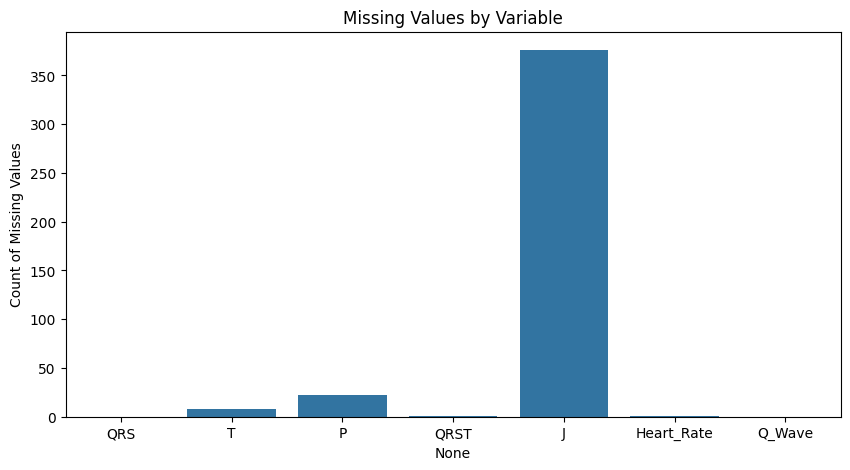

In [12]:
plt.figure(figsize=(10, 5))  # Adjust the figsize to a reasonable size, e.g., (12, 6)
sns.barplot(x=new_df.columns[9:16], y=new_df.isnull().sum()[9:16])
plt.ylabel('Count of Missing Values')
plt.title('Missing Values by Variable')
plt.show()

Result:
<br>Column Names with Missing Data:
<br>J: 83.19% missing
<br>P: 4.87% missing
<br>T: 1.77% missing
<br>QRST: 0.22% missing
<br>Heart_Rate: 0.22% missing
<br>J has a significant amount of missing data (over 83%). This could indicate a column with potentially unreliable data.so we consider to drop this column and for rest of the columns we will use imputation technique.

<br>

In [13]:
#Dropping columns with maximum null values
final_df = new_df.drop(columns ="J")
#final_df.to_csv("FInal_Dataset_with_dropped_Attribute.csv")
final_df.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [14]:
#Using simple imputation with mean for handling missing values 
my_imputer = SimpleImputer()
final_df1 = pd.DataFrame(my_imputer.fit_transform(final_df))
final_df1.columns = final_df.columns


In [15]:
#checking null values 
missing_value_describe(final_df1)

Number of columns with missing values: 0
No misisng data!!!


In [16]:
final_df1.describe()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [17]:
final_df1

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53.0,1.0,160.0,70.0,80.0,199.0,382.0,154.0,117.0,-37.0,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1.0
448,37.0,0.0,190.0,85.0,100.0,137.0,361.0,201.0,73.0,86.0,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10.0
449,36.0,0.0,166.0,68.0,108.0,176.0,365.0,194.0,116.0,-85.0,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2.0
450,32.0,1.0,155.0,55.0,93.0,106.0,386.0,218.0,63.0,54.0,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1.0


### 04.Exploratory Data Analysis (EDA)

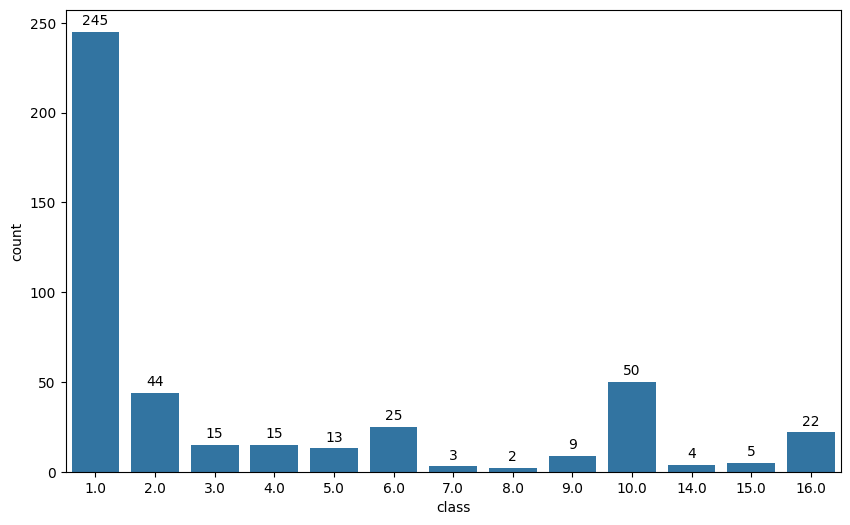

In [18]:
#Data distribution
fig, ax = plt.subplots(figsize=(10, 6))  # Set width=12 and height=8 inches

# Count plot
sns.countplot(x='class', data=final_df1, ax=ax)

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()

Class Labels

       Class code :   Class   :                       Number of instances:
       01             Normal				          245
       02             Ischemic changes (Coronary Artery Disease)   44
       03             Old Anterior Myocardial Infarction           15
       04             Old Inferior Myocardial Infarction           15
       05             Sinus tachycardy			           13
       06             Sinus bradycardy			           25
       07             Ventricular Premature Contraction (PVC)       3
       08             Supraventricular Premature Contraction	    2
       09             Left bundle branch block 		            9	
       10             Right bundle branch block		           50
       11             1. degree AtrioVentricular block	            0	
       12             2. degree AV block		            0
       13             3. degree AV block		            0
       14             Left ventricule hypertrophy 	            4
       15             Atrial Fibrillation or Flutter	            5
       16             Others				           22

In [19]:
final_df1.shape

(452, 279)

As we have many outliers, using the RobustScaler is appropriate for scaling, as it uses the median and interquartile range instead of mean and standard deviation.

In [41]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

# Separate the 'Sex' column from the features
X = final_df1.drop('class', axis=1)  
y = final_df1['class'].astype(int)  # Convert 'class' to integer
sex_column = X['Sex'].astype(int)  # Ensure 'Sex' stays as integer
X_without_sex = X.drop('Sex', axis=1)

# Apply RobustScaler to the features excluding 'Sex'
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_without_sex)

# Convert the scaled data back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X_without_sex.columns)

# Add the 'Sex' column back to the DataFrame as integer
X_scaled_df['Sex'] = sex_column.values

# Reorder columns to match the original DataFrame's order (optional)
X_scaled_df = X_scaled_df[['Sex'] + list(X_without_sex.columns)]

# Convert the 'class' column back to the DataFrame
final_scaled_df = pd.concat([X_scaled_df, y], axis=1)

# Check the scaled DataFrame with 'class' as integer
print(final_scaled_df.head())


   Sex       Age  Height  Weight   QRS_Dur   P-R_Int   Q-T_Int     T_Int  \
0    0  1.272727     2.6    0.60  0.357143  1.090909  0.117647  0.387097   
1    1  0.409091     0.1   -0.20 -0.357143  0.515152  1.000000 -0.419355   
2    0  0.318182     0.8    1.35  3.714286  0.181818  0.558824  0.741935   
3    0  0.363636     1.1    1.30  1.000000  1.363636  0.382353  0.548387   
4    0  1.272727     2.6    0.60  0.142857  0.727273 -0.205882  0.483871   

      P_Int       QRS  ...  V6271     V6272     V6273  V6274  V6275     V6276  \
0  1.304348 -0.899598  ...    0.0  0.043478  0.095238    0.0    0.0  1.333333   
1 -2.260870 -0.240964  ...    0.0 -0.065217  0.523810    0.0    0.0 -1.000000   
2  0.478261  0.899598  ...    0.0  0.152174 -0.619048    0.0    0.0 -0.666667   
3  2.260870 -0.192771  ...    0.0  0.739130 -0.523810    0.0    0.0 -0.333333   
4  0.521739 -0.899598  ...    0.0  0.934783 -1.190476    0.0    0.0 -2.000000   

     V6277     V6278     V6279  class  
0  0.96875  0.36

Given the highly imbalanced nature of our dataset and its health-related context, the overuse of synthetic data could introduce biases, potentially leading the model to overestimate the prevalence of rare conditions. 

This is particularly concerning in healthcare, where accuracy and reliability are critical. To address this, we propose simplifying the classification task into a binary problem. 

Specifically, we will classify patients as either having arrhythmia (1 = True) or not having arrhythmia (0 = False). In this approach, the "Normal" class will represent the negative class (0), while all other conditions will be grouped into the positive class (1).

In [63]:
# Assuming 'y' is the original target variable with the class labels
y_binary = y.copy()  # Copy the original labels

# Map 'Normal' (class 1) to 0 (no arrhythmia) and the rest to 1 (arrhythmia)
y_binary = y_binary.apply(lambda x: 0 if x == 1 else 1)

# Check the distribution after conversion
print(y_binary.value_counts())


class
0    245
1    207
Name: count, dtype: int64


**Handling imbalanced class**

In [76]:
from sklearn.model_selection import train_test_split

# Assuming X contains the features
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_binary, test_size=0.3, random_state=42, stratify=y_binary)

# Check the class distribution in train and test sets
print(f'Train set class distribution: \n{y_train.value_counts()}')
print(f'Test set class distribution: \n{y_test.value_counts()}')


Train set class distribution: 
class
0    171
1    145
Name: count, dtype: int64
Test set class distribution: 
class
0    74
1    62
Name: count, dtype: int64


In [77]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek

In [78]:
pipeline = Pipeline([
    ('model', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred_resampled = pipeline.predict(X_test)

# Method 2: Using Class Weights
model_class_weights = RandomForestClassifier(class_weight='balanced', random_state=42)
model_class_weights.fit(X_train, y_train)
y_pred_class_weights = model_class_weights.predict(X_test)


# Evaluation Metrics for Method 2 (Class Weights)
print("Evaluation Metrics for Class Weights")
print(classification_report(y_test, y_pred_class_weights))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_class_weights)}")


Evaluation Metrics for Class Weights
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        74
           1       0.86      0.81      0.83        62

    accuracy                           0.85       136
   macro avg       0.85      0.85      0.85       136
weighted avg       0.85      0.85      0.85       136

ROC-AUC Score: 0.8491717523975588


In [79]:
smote_tomek = SMOTETomek(sampling_strategy='auto', random_state=42)
pipeline = Pipeline([
    ('smote_tomek', smote_tomek),
    ('model', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred_smote_tomek = pipeline.predict(X_test)

# Evaluation Metrics
print("Evaluation Metrics for SMOTETomek")
print(classification_report(y_test, y_pred_smote_tomek))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_smote_tomek)}")


Evaluation Metrics for SMOTETomek
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        74
           1       0.84      0.84      0.84        62

    accuracy                           0.85       136
   macro avg       0.85      0.85      0.85       136
weighted avg       0.85      0.85      0.85       136

ROC-AUC Score: 0.85178727114211


**Models that generally perform well on binary classification tasks:**

- Logistic Regression: Baseline model for binary classification, interpretable.
- Random Forest: Handles imbalanced data better and gives feature importance.
- XGBoost: Great for imbalanced data and often achieves high accuracy.
- Support Vector Machines (SVM): Effective for binary classification, especially in cases with high-dimensional data.

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

def evaluate_model(X_train, y_train, X_test, y_test, model):
    """
    Evaluate a given model using SMOTETomek resampling.

    Parameters:
    - X_train: Training features
    - y_train: Training labels
    - X_test: Test features
    - y_test: Test labels
    - model: The model to evaluate

    Returns:
    - None
    """
    smote_tomek = SMOTETomek(sampling_strategy='auto', random_state=42)
    pipeline = Pipeline([
        ('smote_tomek', smote_tomek),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(f"Evaluation Metrics for {model.__class__.__name__}:")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred)}")
    print(f"Accuracy Score: {pipeline.score(X_test, y_test)}")
    print("\n")

# Example usage:
models = [
    LogisticRegression(random_state=42,max_iter=1000),
    RandomForestClassifier(random_state=42),
    XGBClassifier(random_state=42),
    SVC(probability=True, random_state=42)
]


for model in models:
    evaluate_model(X_train, y_train, X_test, y_test, model)


Evaluation Metrics for LogisticRegression:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        74
           1       0.70      0.74      0.72        62

    accuracy                           0.74       136
   macro avg       0.73      0.74      0.73       136
weighted avg       0.74      0.74      0.74       136

ROC-AUC Score: 0.7358326068003487
Accuracy Score: 0.7352941176470589


Evaluation Metrics for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        74
           1       0.84      0.84      0.84        62

    accuracy                           0.85       136
   macro avg       0.85      0.85      0.85       136
weighted avg       0.85      0.85      0.85       136

ROC-AUC Score: 0.85178727114211
Accuracy Score: 0.8529411764705882


Evaluation Metrics for XGBClassifier:
              precision    recall  f1-score   support

           0       0.87

XGBoost and Random Forest are the best-performing models for this binary classification task. XGBoost slightly outperforms Random Forest in terms of accuracy and ROC-AUC score.